<a href="https://colab.research.google.com/github/Dac196/machine-learning/blob/main/pre_procesamiento_dataset_golf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Segundo dataset**

En este conjunto de datos se cuenta con diferentes tipos de diseño de pelotas de golf y se busca comprobar si el diseño de la pelota tiene una relación con la distancia que estas pueden llegar a recorrer.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bartlett # prubea de igualdad de varianza
from scipy.stats import normaltest # prueba de normalidad
from scipy.stats import f_oneway #prueba ANDEVA una vía
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
df = pd.read_csv("Golfball.csv",delimiter=';')

In [ ]:
df.head(10)

,Design,Distance
0,Design1,206.32
1,Design1,207.94
2,Design1,206.19
3,Design1,204.45
4,Design1,209.65
5,Design1,203.81
6,Design1,206.75
7,Design1,205.68
8,Design1,204.49
9,Design1,210.86


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Design    40 non-null     object 
 1   Distance  40 non-null     float64
dtypes: float64(1), object(1)
memory usage: 768.0+ bytes


In [ ]:
df.groupby('Design').size()

Design
Design1    10
Design2    10
Design3    10
Design4    10
dtype: int64

Se consulta el tamaño del dataset y la moda de los datos en este caso se evidencia que para la prueba se tuvieron en cuenta 10 pelotas de cada uno de los 4 diseños

In [ ]:
columns_names = df.columns.values
print (columns_names)

['Design' 'Distance']


<function matplotlib.pyplot.show(close=None, block=None)>

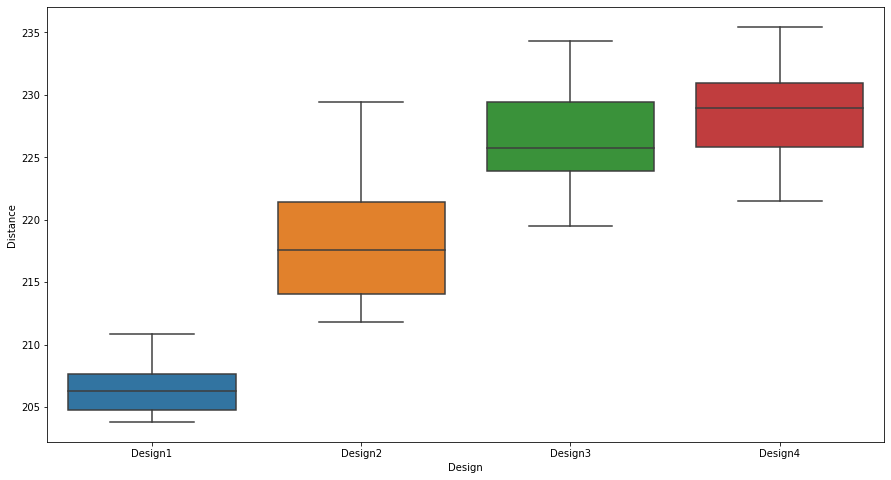

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.boxplot(x="Design", y="Distance", data=df, ax=ax)
plt.show

Se grafica la distribución de cada uno de los diseños de las pelotas.

In [ ]:
df.groupby('Design').agg(['mean', 'std'])

Distance          
            mean       std
Design                    
Design1  206.614  2.290508
Design2  218.516  5.537796
Design3  226.588  4.814782
Design4  228.622  4.013349

Se agrupa los datos por cada uno de los diseños para consultae la media y la  desviacion estandar.

Se evidencia una desviación estandar bastante alta entre cada uno de los modelos.

In [ ]:
#Prueba de normalidad
S,p = normaltest(df['Distance'])
alfa = 0.05
print('p = {:g}'.format(p))

if p<alfa:
    print('No existen evidencias estadísticas para suponer normalidad')
else:
    print('Existen evidencias estadísticas para suponer normalidad')

p = 0.00808083
No existen evidencias estadísticas para suponer normalidad


Se hace la prueba de normalidad y se evidencia que entre el conjunto de datos no se tiene uniformidad, el valor de alpha es superior al error que se definio, se trabaja con error tipo 1.

In [ ]:
disenio1 = df['Design'] == 'Design1'
disenio2 = df['Design'] == 'Design2'
disenio3 = df['Design'] == 'Design3'
disenio4 = df['Design'] == 'Design4'
df_1 = df[disenio1]
df_2 = df[disenio2]
df_3 = df[disenio3]
df_4 = df[disenio4]

Se separa cada en un nuevo data set cada uno de los diseños para realizar prueba de normalidad.

In [ ]:
#Prueba de normalidad
S,p = normaltest(df_1['Distance'])
alfa = 0.05
print('p = {:g}'.format(p))

if p<alfa:
    print('No existen evidencias estadísticas para suponer normalidad')
else:
    print('Existen evidencias estadísticas para suponer normalidad')

p = 0.543912
Existen evidencias estadísticas para suponer normalidad


In [ ]:
#Prueba de normalidad
S,p = normaltest(df_2['Distance'])
alfa = 0.05
print('p = {:g}'.format(p))

if p<alfa:
    print('No existen evidencias estadísticas para suponer normalidad')
else:
    print('Existen evidencias estadísticas para suponer normalidad')

p = 0.515665
Existen evidencias estadísticas para suponer normalidad


In [ ]:
#Prueba de normalidad
S,p = normaltest(df_3['Distance'])
alfa = 0.05
print('p = {:g}'.format(p))

if p<alfa:
    print('No existen evidencias estadísticas para suponer normalidad')
else:
    print('Existen evidencias estadísticas para suponer normalidad')

p = 0.788592
Existen evidencias estadísticas para suponer normalidad


In [ ]:
#Prueba de normalidad
S,p = normaltest(df_4['Distance'])
alfa = 0.05
print('p = {:g}'.format(p))

if p<alfa:
    print('No existen evidencias estadísticas para suponer normalidad')
else:
    print('Existen evidencias estadísticas para suponer normalidad')

p = 0.940378
Existen evidencias estadísticas para suponer normalidad


Entre los 4 diseños de pelotas se encuentra que si tienen una distribución normal lo que significa que probablemente la distancia recorrida si es afectada por esta.

In [ ]:
#ANDEVA

# Ho: todas las medias son iguales
# Ha: al menos una de las medias es diferente

# Criterio: Fc<F entonces Ho es verdadero
# y si Fc>= F entonces Ho no es verdadero

Fc , p = f_oneway(df_1['Distance'].values,df_2['Distance'].values,df_3['Distance'].values,df_4['Distance'])

de = 40-4
nu = 4-1
import scipy.stats
F= scipy.stats.f.ppf(q=1-0.05, dfn=nu, dfd=de)

if Fc < F:
    print('Fc = {:g}'.format(Fc), ' < ', 'F = {:g}'.format(F), ' p = {:g}'.format(p))
    print('No existen evidencias suficientes para rechazar Ho')
    print(',por lo que podemos suponer que no hay diferencia entre medias')
else:
    print('Fc = {:g}'.format(Fc), ' >= ', 'F = {:g}'.format(F), ' p = {:g}'.format(p))
    print('Existen evidencias suficientes para rechazar Ho')
    print(',por lo que podemos suponer que al menos una de las medias es diferentes')

Fc = 53.0298  >=  F = 2.86627  p = 2.73199e-13
Existen evidencias suficientes para rechazar Ho
,por lo que podemos suponer que al menos una de las medias es diferentes


Conclusiones

Para hacer una correcta hipotesis es necesario hacer una limpieza de datos y asegurar la calidad del dato para que no se den resultados alterados.

Es importante realizar un adecuado analisis del conjunto de datos para poder hacer un test estadistico de manera adecuada.

Se realiza la prueba con dos conjuntos de datos para poder visualizar adecuadamente la aplicación de la prueba estadistica en python. En los dos se trabajo con un error tipo 1, en los 2 casos los datos no tuvieron normalidad.

Infografia
https://www.kaggle.com/code/kerneler/starter-anova-golfball-24ac8440-a

https://www.kaggle.com/datasets/eduarmma19/movilidad-de-bogot-caracterizacin-viajes

https://www.cienciadedatos.net/documentos/pystats09-analisis-de-varianza-anova-python.html#Test-ANOVA
